In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('water_potability.csv')

In [3]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df['Potability']=df['Potability'].astype('category')

### Statistical analysis

In [6]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

In [7]:
#Portability is 1 - means good for Human
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

In [8]:
# Portability is 0 - means not good for Human
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdBu')

In [9]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
df[df['Sulfate'].isnull()]
df[df['ph'].isnull()]
df[df['Trihalomethanes'].isnull()]

ph    Hardness        Solids  Chloramines     Sulfate  \
62         NaN  229.485694  35729.692709     8.810843  384.943779   
81    5.519126  168.728583  12531.601921     7.730723         NaN   
110   9.286155  222.661551  12311.268366     7.289866  332.239359   
118   7.397413  122.541040   8855.114121     6.888689  241.607532   
119   7.812804  196.583886  42550.841816     7.334648         NaN   
...        ...         ...           ...          ...         ...   
3174  6.698154  198.286268  34675.862845     6.263602  360.232834   
3185  6.110022  234.800957  16663.539074     5.984536  348.055211   
3219  6.417716  209.702425  31974.481631     7.263425  321.382124   
3259  9.271355  181.259617  16540.979048     7.022499  309.238865   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity Potability  
62      296.397547       16.927092              NaN   3.855602          0  
81      443.570372       18.099078              NaN   3.758996          0  
110     353.740100       14.171763              NaN   5.239982          0  
118     489.851600       13.365906              NaN   3.149158          0  
119     442.545775       14.666917              NaN   6.204846          0  
...            ...             ...              ...        ...        ...  
3174    430.935009       12.176678              NaN   3.758180          1  
3185    437.892115       10.059523              NaN   2.817780          1  
3219    289.450118       11.369071              NaN   4.210327          1  
3259    487.692788       13.228441              NaN   4.333953          1  
3272    392.449580       19.903225              NaN   2.798243          1  

[162 rows x 10 columns]

In [11]:
#Replace null values based on the group/sample mean
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [12]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### EDA - Exploratory Data Analysis

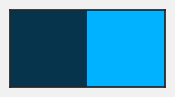

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
colors = ['#06344d','#00b2ff']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})
sns.palplot(colors)

Text(0.8, 1500, 'Safe for Human consumption')

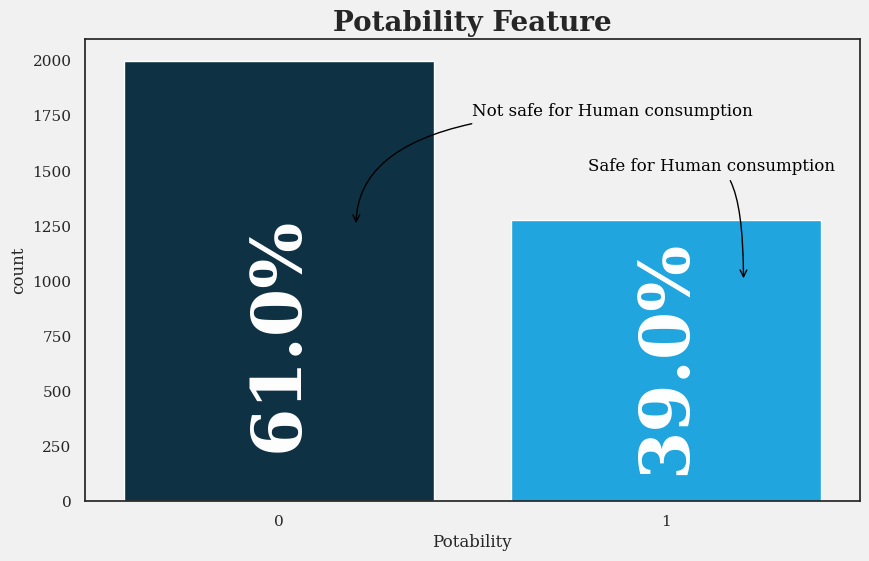

In [14]:
fig = plt.figure(figsize=(10,6))
ax=sns.countplot(data=df, x='Potability')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(df)*100,0)}%", ha='center', size=50, weight='bold', rotation=90, color='white')
plt.title("Potability Feature", size=20, weight='bold')
plt.annotate(text="Not safe for Human consumption", xytext=(0.5,1750),xy=(0.2,1250), arrowprops =dict(arrowstyle="->", color='black', connectionstyle="angle3,angleA=0,angleB=90"), color='black')
plt.annotate(text="Safe for Human consumption", xytext=(0.8,1500),xy=(1.2,1000), arrowprops =dict(arrowstyle="->", color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')

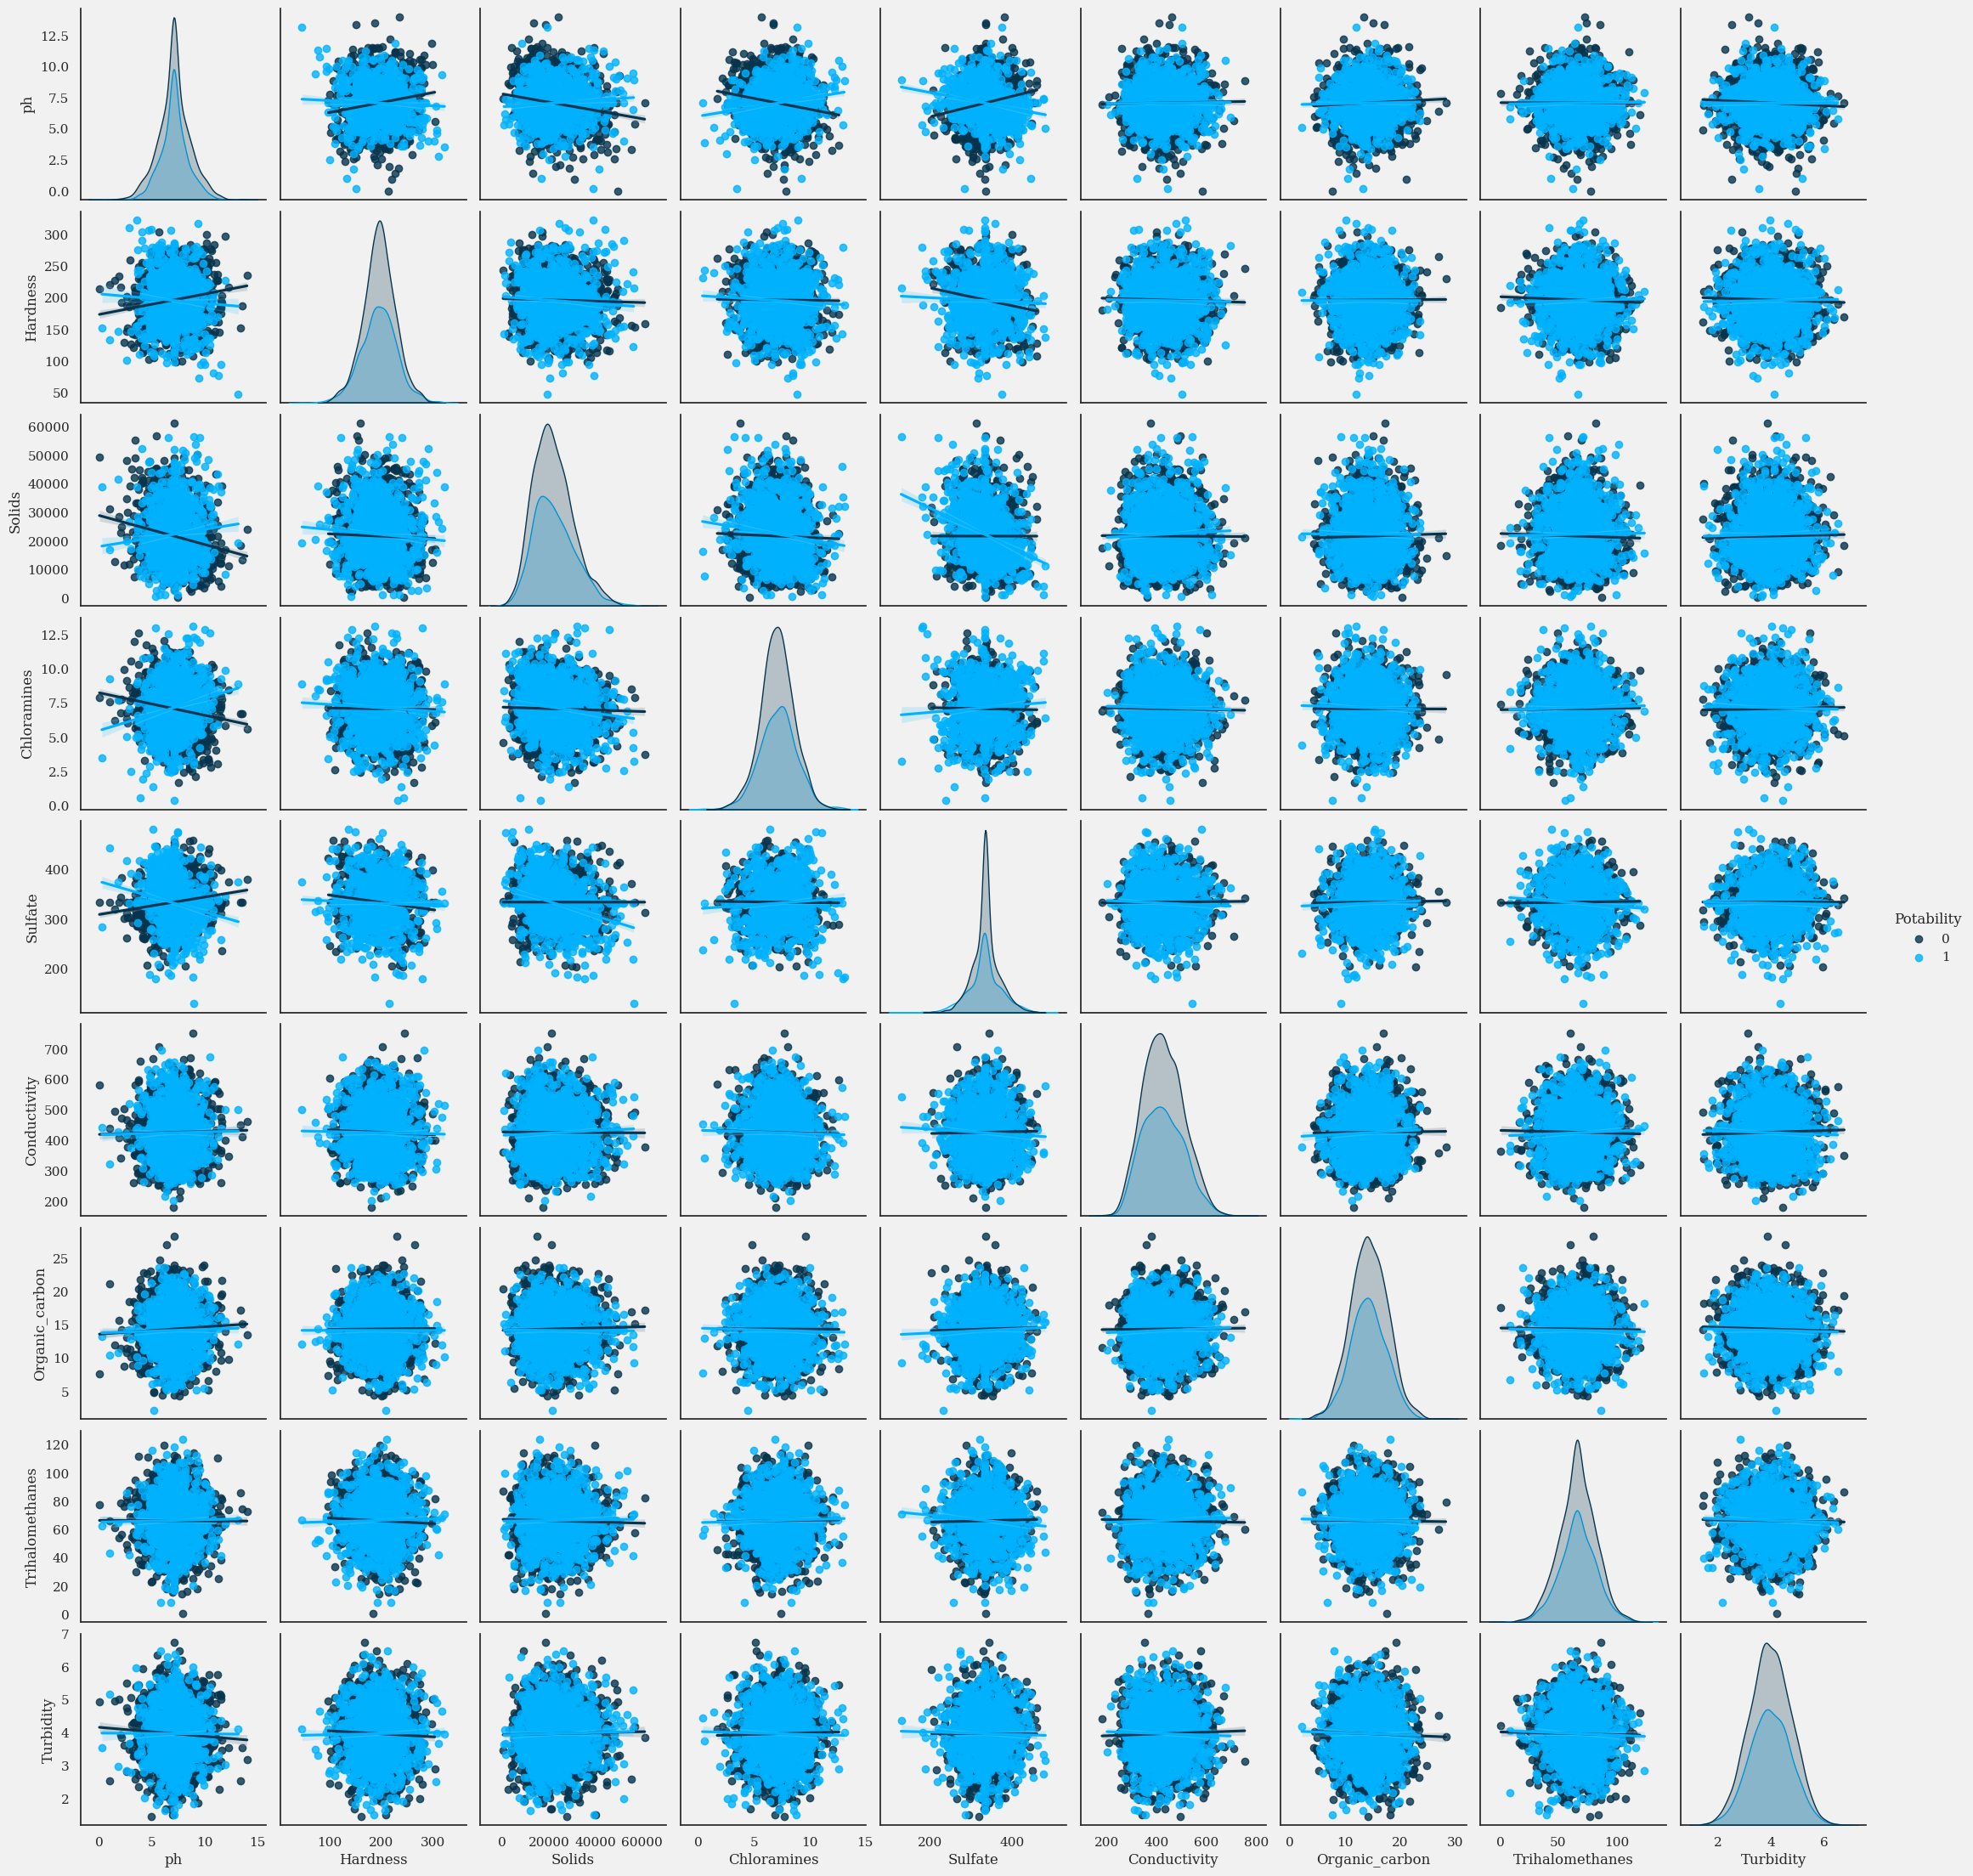

In [15]:
sns.pairplot(df, hue='Potability', kind='reg')

C:\Users\Dell\AppData\Local\Temp\ipykernel_8056\627610665.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[df['Potability']==1].corr(), annot= True, cmap='coolwarm')


<Axes: >

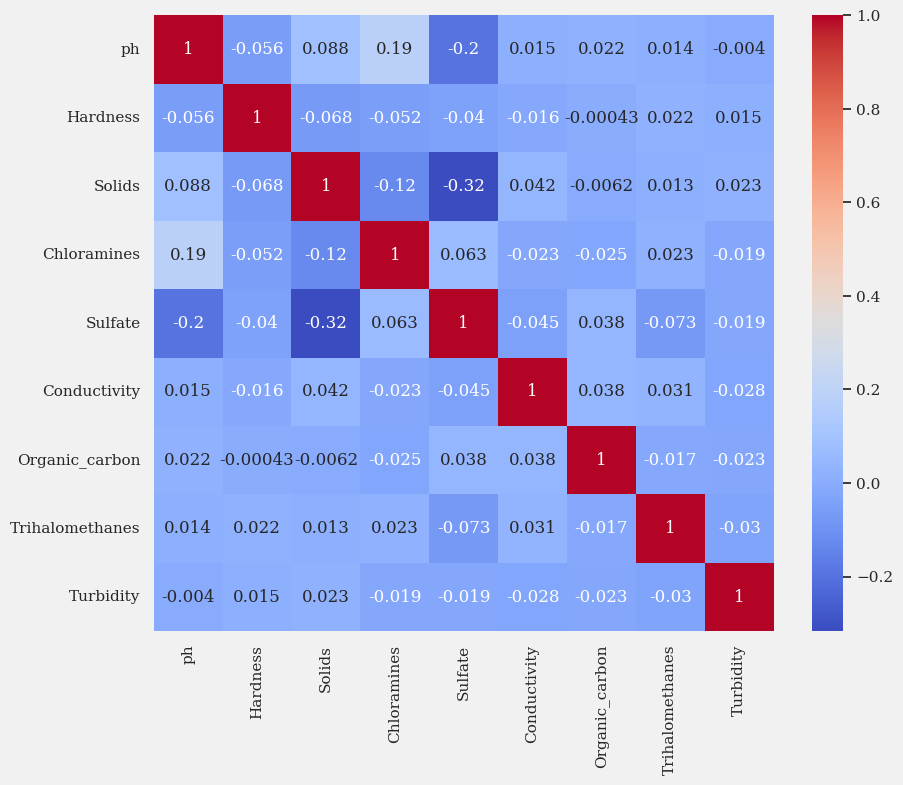

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[df['Potability']==1].corr(), annot= True, cmap='coolwarm')

C:\Users\Dell\AppData\Local\Temp\ipykernel_8056\2750581707.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[df['Potability']==0].corr(), annot= True, cmap='coolwarm')


<Axes: >

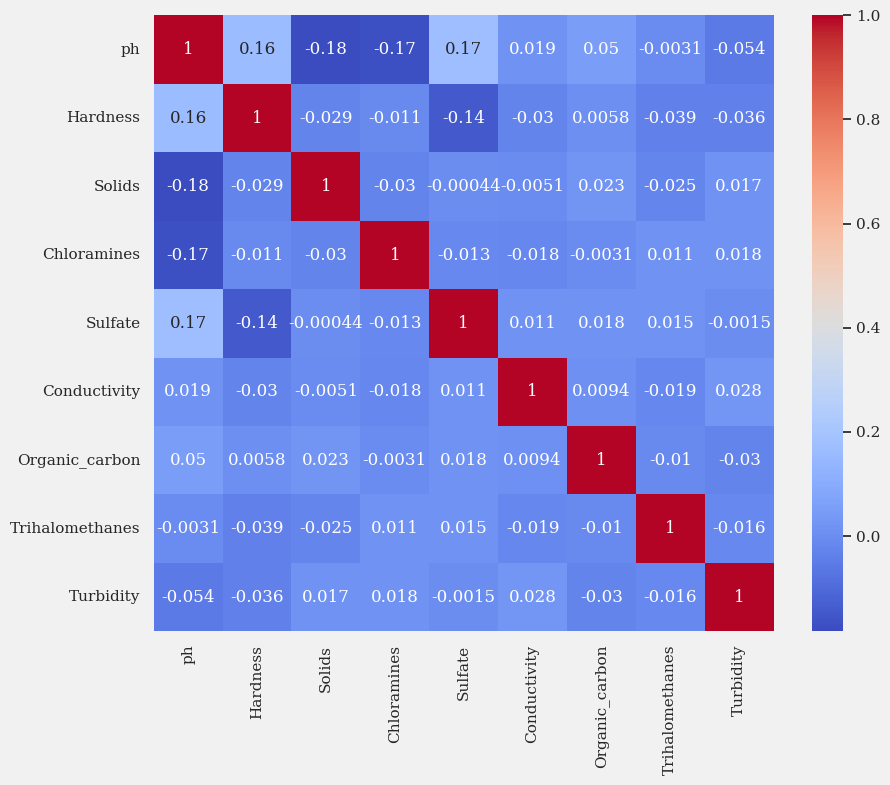

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[df['Potability']==0].corr(), annot= True, cmap='coolwarm')

<Axes: xlabel='Potability', ylabel='ph'>

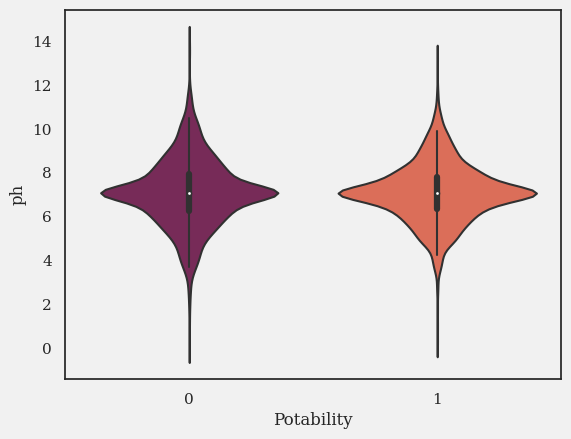

In [18]:
sns.violinplot(x='Potability', y='ph', data=df, palette='rocket')

C:\Users\Dell\AppData\Local\Temp\ipykernel_8056\3989945425.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Potability'])


<Axes: xlabel='Potability', ylabel='Density'>

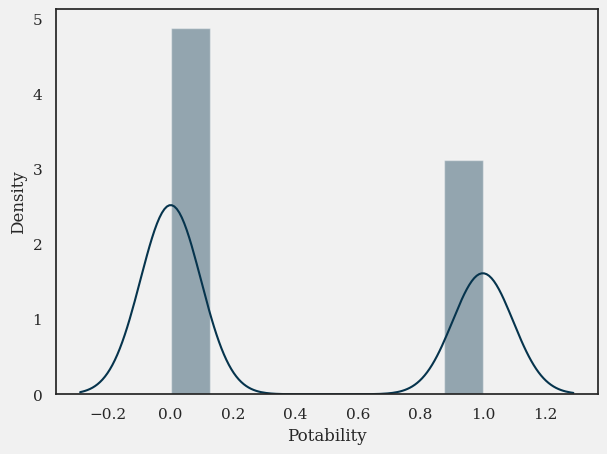

In [19]:
plt.rcParams['figure.figsize'] = [7,5]
sns.distplot(df['Potability'])

In [20]:
fig =  px.pie (df, names = "Potability", hole = 0.4, template = "plotly")
fig.show ()

In [21]:
fig = px.scatter (df, x = "Organic_carbon", y = "Hardness", color = "Potability", template = "plotly",  trendline="lowess")
fig.show ()

### Train test split

In [22]:
X=df.drop(['Potability'], axis=1)
y=df['Potability']
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [25]:
from imblearn.over_sampling import SMOTE
samp = SMOTE()

In [26]:
X_train, y_train =samp.fit_resample(X_train,y_train)

scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)


In [27]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

In [28]:
Model_dt = DecisionTreeClassifier()
cross_val_score(Model_dt, X_train, y_train, scoring='accuracy', cv=5).mean()

0.7177372962607862

In [29]:
Model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
y_pred = Model_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.706959706959707

In [31]:
Model_et =ExtraTreeClassifier()
cross_val_score(Model_et, X_train, y_train, scoring='accuracy', cv=5).mean()

0.5910591619198015

In [32]:
Model_et.fit(X_train, y_train)

ExtraTreeClassifier()

In [33]:
y_pred2 = Model_et.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
accuracy2

0.557997557997558

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
m3 = GradientBoostingClassifier()

In [36]:
m3.fit(X_train,y_train)

GradientBoostingClassifier()

In [37]:
y_pred3 = m3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
accuracy3

0.7667887667887668

In [38]:
cross_val_score(m3, X_train, y_train, scoring='accuracy', cv=5).mean()

0.7580615870509277

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
m4 = KNeighborsClassifier()


In [41]:
m4.fit(X_train,y_train)

KNeighborsClassifier()

In [42]:
y_pred4 = m4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
accuracy4

0.5995115995115995

In [43]:
cross_val_score(m4, X_train, y_train, scoring='accuracy', cv=5).mean()

0.651880886582821

In [44]:
from sklearn.ensemble import RandomForestClassifier
model5 =  RandomForestClassifier()

In [45]:
model5.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
y_pred5 = model5.predict(X_test)
accuracy5 = accuracy_score(y_test, y_pred5)
accuracy5

0.7692307692307693

In [47]:
cross_val_score(model5, X_train, y_train, scoring='accuracy', cv=5).mean()

0.7883024082116068

In [48]:
from sklearn.metrics import roc_auc_score

In [49]:
mod = []
cv_score=[]
acc = []
model =[GradientBoostingClassifier(), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier()]
for m in model:
    cv_score.append(cross_val_score(m, X_train, y_train, scoring='accuracy', cv=5).mean())
    m.fit(X_train,y_train)
    y_predd = m.predict(X_test)
    acc.append(accuracy_score(y_test, y_predd))
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score','accuracy'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df['accuracy'] = acc
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

In [50]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7028459927660383

In [51]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred3)

0.7757567104511709

In [52]:
roc_auc_score(y_test, y_pred4)

0.5980772891680944

In [53]:
roc_auc_score(y_test, y_pred5)

0.7592233009708739

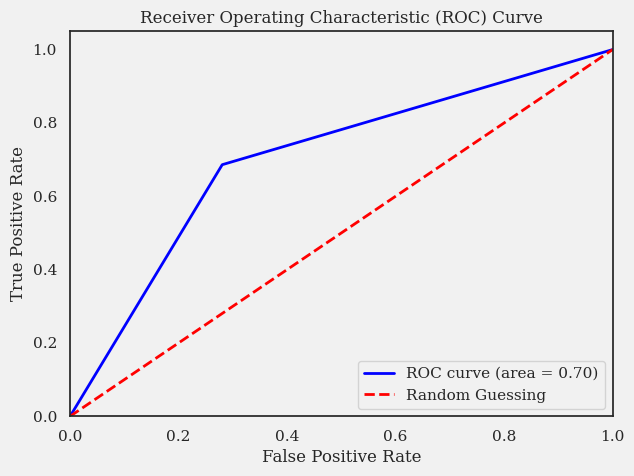

In [54]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


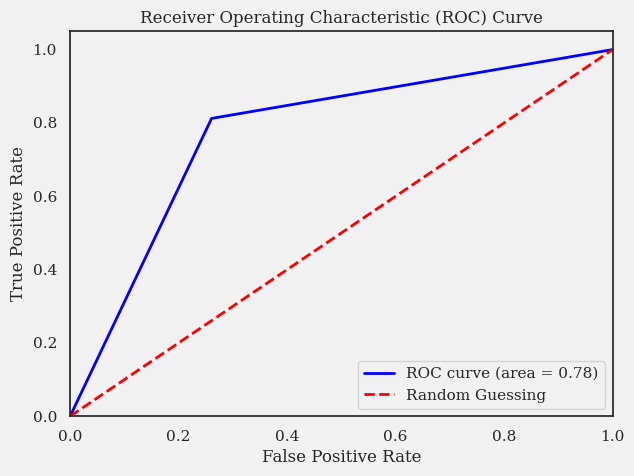

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


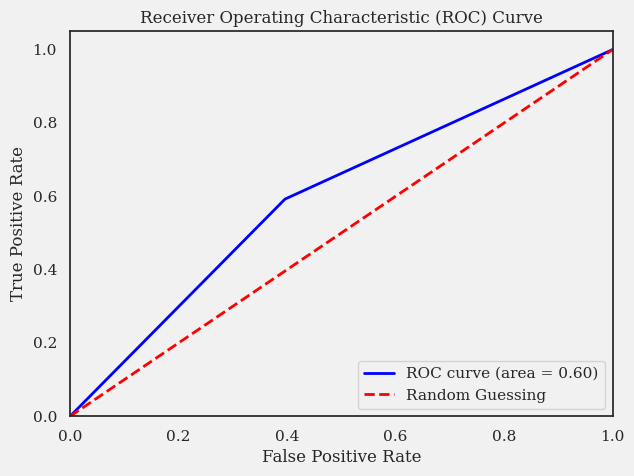

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred4)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


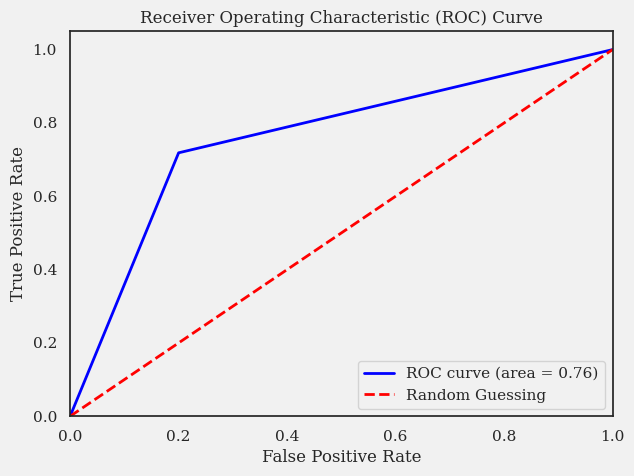

In [57]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred5)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
